In [1]:
from PIL import Image
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def get_class(x):
    return str(x.parent).split("/")[-1]

In [6]:
data_dir = r'skin-dataset-clasification/data/Split_smol/train/'
p = Path(data_dir).glob('**/*')
files = [(x, get_class(x), Image.open(x).size,Image.open(x)) for x in p if x.is_file()]
df_train = pd.DataFrame(files, columns=["path", "class", "resolution","data"])

In [7]:
data_dir = r'skin-dataset-clasification/data/Split_smol/val/'
p = Path(data_dir).glob('**/*')
files = [(x, get_class(x), Image.open(x).size,Image.open(x)) for x in p if x.is_file()]
df_val = pd.DataFrame(files, columns=["path", "class", "resolution", "data"])

<Axes: xlabel='resolution'>

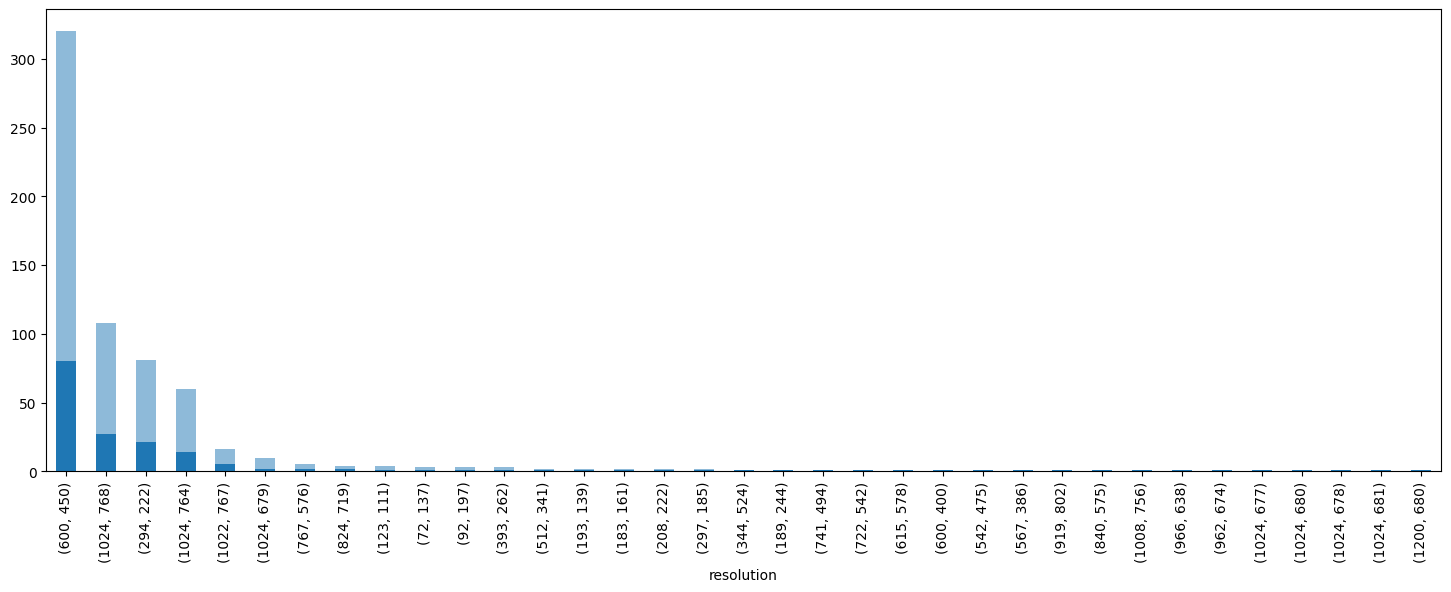

In [8]:
plt.figure(figsize=(18,6))
df_train.groupby("resolution").size().sort_values(ascending=False).plot.bar(alpha=0.5)
df_val.groupby("resolution").size().sort_values(ascending=False).plot.bar()

In [ ]:
plt.figure(figsize=(18,6))
df_train.groupby("class").size().sort_values(ascending=False).plot.bar(alpha=0.5)
df_val.groupby("class").size().sort_values(ascending=False).plot.bar()

In [ ]:
imgs = 5
classes = 9
fig, axes = plt.subplots(nrows=classes,ncols=imgs,figsize=(24,24))
fig.tight_layout()
aux_df = df_train.groupby("class").head(imgs)
for idx in range(classes*imgs):
    ax = plt.subplot(classes,imgs,idx+1)
    ax.imshow(aux_df.data.iloc[idx])
    ax.set_title(aux_df["class"].iloc[idx])

In [ ]:
imgs = 5
classes = 9
fig, axes = plt.subplots(nrows=classes,ncols=imgs,figsize=(24,24))
fig.tight_layout()
aux_df = df_val.groupby("class").head(imgs)
for idx in range(classes*imgs):
    ax = plt.subplot(classes,imgs,idx+1)
    ax.imshow(aux_df.data.iloc[idx])
    ax.set_title(aux_df["class"].iloc[idx])